In [196]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer

url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%205%20-%20Data%20Processing/W5D2%20-%20bis/Student%20Mental%20health%20Document.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

# Loading and Understanding the Dataset

In [197]:
# Loading Dataset
df = pd.read_csv('.\data\Student Mental health.csv')
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [198]:
# Understanding the Dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [199]:
# Deeper Dive into the Categorical Columns
for col in df:
    print(df[col].value_counts(), '\n')

Timestamp
8/7/2020 12:39         3
8/7/2020 14:29         2
8/7/2020 13:13         2
8/7/2020 12:43         2
8/7/2020 16:34         2
                      ..
13/07/2020 19:56:49    1
13/07/2020 21:21:42    1
13/07/2020 21:22:56    1
13/07/2020 21:23:57    1
18/07/2020 20:16:21    1
Name: count, Length: 92, dtype: int64 

Choose your gender
Female    75
Male      26
Name: count, dtype: int64 

Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: count, dtype: int64 

What is your course?
BCS                        18
Engineering                17
BIT                        10
KOE                         4
Biomedical science          4
psychology                  2
BENL                        2
Engine                      2
Laws                        2
Irkhs                       1
Psychology                  1
Accounting                  1
KENMS                       1
Mathemathics                1
Pendidikan islam            1
Human Resources       

# Cleaning the Dataset

In [200]:
# Drop Unecessary Columns
df = df.drop(columns='Timestamp')

In [201]:
# Change Column Names
df = df.rename(columns={'Choose your gender': 'gender',
                        'What is your course?' : 'course',
                        'Your current year of Study' : 'year',
                        'What is your CGPA?' : 'CPGA'})

In [202]:
# Clean Year of Study Column
df['year'] = df['year'].map({
    'year 1' : 1,
    'Year 1' : 1,
    'year 2' : 2,
    'Year 2' : 2,
    'year 3' : 3,
    'Year 3' : 3,
    'year 4' : 4,
    'Year 4' : 4
})

df['year'].value_counts()

year
1    43
2    26
3    24
4     8
Name: count, dtype: int64

In [203]:
# Cleaning 'Age' Column
# Fill Null Values
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Change Float Values to Int (and handle the non-whole numbers)
df['Age'] = df['Age'].astype('int')

In [204]:
# Change Column Datatypes
# Separate the Desired Columns from the rest of the set
df_bool = df.drop(columns=['gender', 'Age', 'course', 'year', 'CPGA'])
df_other = df.drop(columns=df_bool.columns)

# Change the Datatypes of df_bool from 'object' to 'bool'
for col in df_bool:
    df_bool[col] = df_bool[col].map({'Yes' : True, 'No' : False}) # Yes/No needs to mapped to True/False
    df_bool = df_bool.astype({col : 'bool'})

# Change the Datatypes of df_other to 'categorical'
for col in df_other:
    df_other[col] = df_other[col].astype('category')

# Merge the separted Dataframes into one
df_clean = pd.concat([df_other, df_bool], axis=1)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   gender                                        101 non-null    category
 1   Age                                           101 non-null    category
 2   course                                        101 non-null    category
 3   year                                          101 non-null    category
 4   CPGA                                          101 non-null    category
 5   Marital status                                101 non-null    bool    
 6   Do you have Depression?                       101 non-null    bool    
 7   Do you have Anxiety?                          101 non-null    bool    
 8   Do you have Panic attack?                     101 non-null    bool    
 9   Did you seek any specialist for a treatment?  101 non-

# Exercise 1: Visualizing the Distribution of CGPA

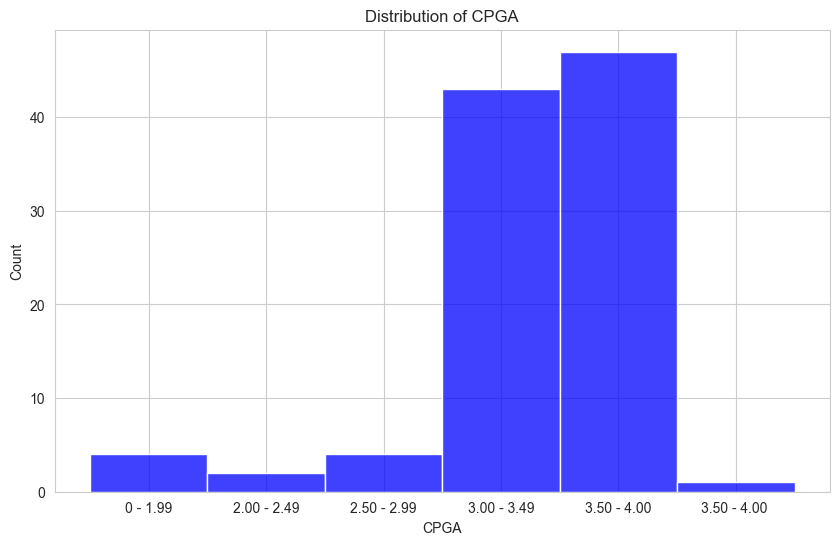

In [205]:
# Use Seaborn’s histplot to create a histogram of the CGPA categories
plt.figure(figsize=(10,6))
sns.histplot(df_clean['CPGA'], color='blue')
plt.title('Distribution of CPGA')
plt.show()

# Exercise 2: Comparing Anxiety Levels Across Different Genders

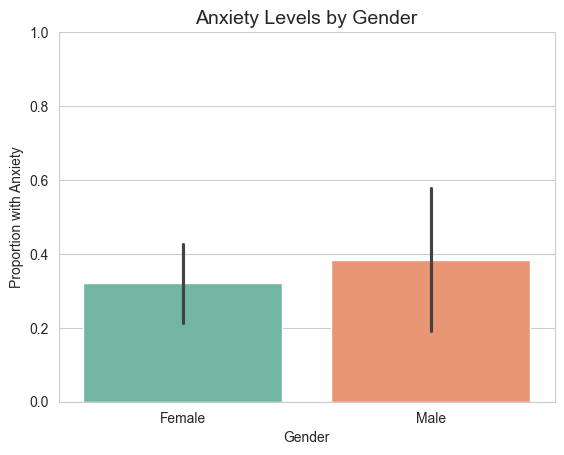

In [206]:
# create a bar plot using Seaborn to compare anxiety levels across genders
sns.barplot(x='gender', y='Do you have Anxiety?', data=df_clean, palette='Set2')
plt.title('Anxiety Levels by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Proportion with Anxiety')
plt.ylim(0, 1)  # since it's a proportion
plt.show()

# Exercise 3: Exploring the Relationship Between Age and Panic Attacks

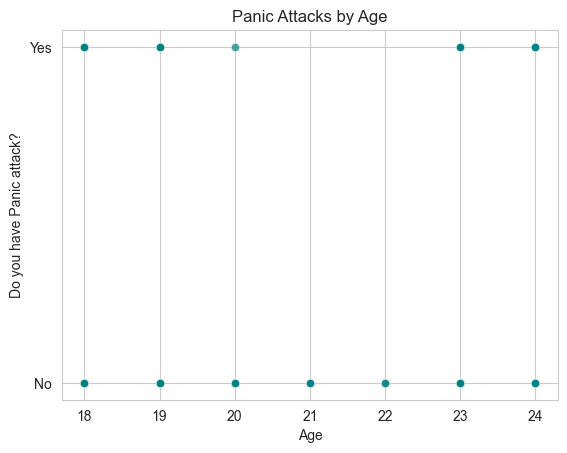

In [207]:
# create a scatter plot with age on the x-axis and the occurrence of panic attacks on the y-axis
sns.scatterplot(
    x='Age',
    y='Do you have Panic attack?',
    data=df_clean,
    alpha=0.7,          # makes points slightly transparent
    color='teal'        # pick a nice readable color
)

# Customize labels and title
plt.title('Panic Attacks by Age')
plt.xlabel('Age')
plt.yticks([0, 1], ['No', 'Yes'])   # make y-axis categorical for readability
plt.show()

# Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot

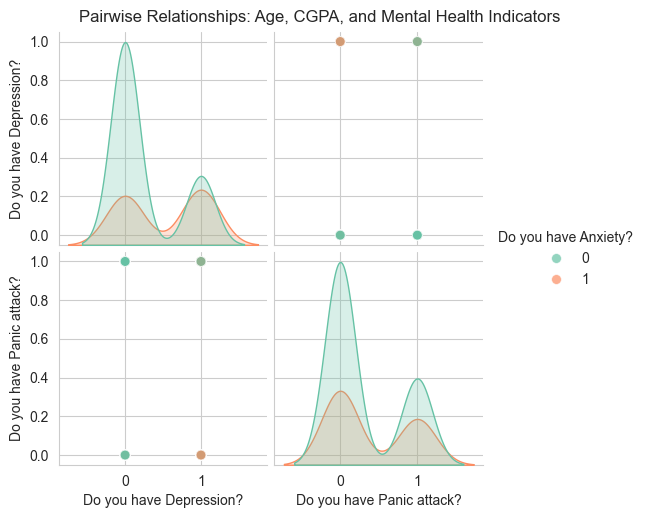

In [208]:
# Use pairplot to visualize pairwise relationships and distributions
# Use only the relevant numeric columns
num_columns = ['Age', 'CPGA', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
df_subset = df_clean[num_columns].copy()

# Change the Boolean Values to Numeric
for col in ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']:
    df_subset[col] = df_subset[col].astype('int')

# Create the Pair Plot
g = sns.pairplot(
    data=df_subset,
    hue='Do you have Anxiety?',
    palette='Set2',
    diag_kind='kde',
    kind='scatter',
    plot_kws={'alpha':0.7, 's':50},  # transparency & size for points
    height=2.5 
)

g.fig.suptitle("Pairwise Relationships: Age, CGPA, and Mental Health Indicators", y=1.02)

plt.show()

# Exercise 5: Creating a Heatmap to Visualize Correlations

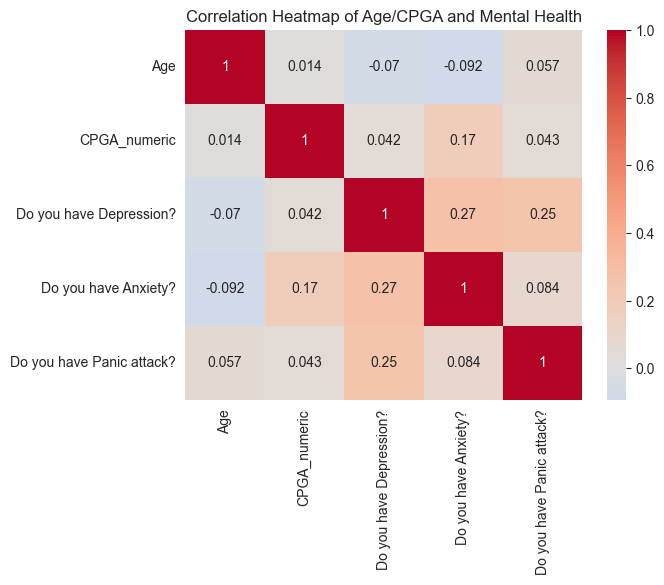

In [209]:
# Convert CPGA to Numeric
def range_to_midpoint(s):
    try:
        low, high = map(float, s.split('-'))
        return (low + high) / 2
    except:
        return None  # in case of missing values

df_clean['CPGA_numeric'] = df_clean['CPGA'].apply(range_to_midpoint)

# Calculate Correlation Matrix
cols = ['Age', 'CPGA_numeric', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
correlation_matrix = df_clean[cols].corr()

# Create Heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Age/CPGA and Mental Health')
plt.show()

# Exercise 6: Analyzing Distributions and Relationships Using FacetGrid

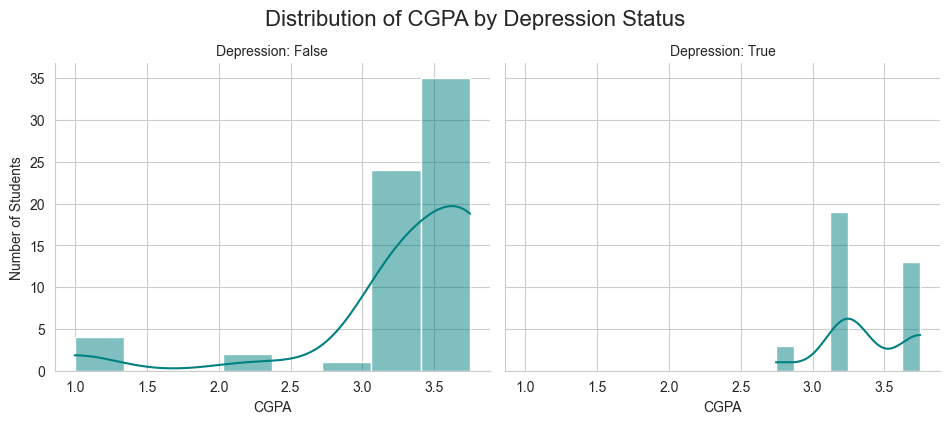

In [210]:
# Explore the distribution of CGPA across different levels of depression status using Seaborn’s FacetGrid
# Create FacetGrid
g = sns.FacetGrid(df_clean, col='Do you have Depression?', 
                  height=4, aspect=1.2, palette='Set2')

# Map histogram to each facet
g.map_dataframe(sns.histplot, x='CPGA_numeric', bins=8, kde=True, color='teal')

# Customize titles for each facet
g.set_axis_labels('CGPA', 'Number of Students')
g.set_titles(col_template='Depression: {col_name}')
g.fig.suptitle('Distribution of CGPA by Depression Status', fontsize=16, y=1.05)

plt.show()